In [1]:
import numpy as np
import os
from airLibs import setupGNVP as gnvp
import pandas as pd
import matplotlib.pyplot as plt
from airLibs import plotting as aplt

In [2]:
CASE = '3D'

# Get Alpha Angles 

In [3]:
AoAmin = -6.0
AoAmax = 15
NoAoA = round(2*(AoAmax - AoAmin) + 1) 
angles = np.linspace(AoAmin, AoAmax, NoAoA)

# Read Data

In [4]:
xflr = pd.read_csv('XFLR5/plane-20_0 m_s.txt',delim_whitespace=True,skiprows=7)
xflr.pop("Beta")
xflr.pop("CDi")
xflr.pop("CDv")
xflr.pop("Cni")
xflr.pop("QInf")
xflr.pop("XCP");

# Get Genu

In [5]:
U0 = 20
Swing = 0.261 
dens = 1.225
Q = 0.5 * dens * U0**2
MAC = 0.121

In [6]:
genu = gnvp.getData(CASE,angles,Q,Swing,MAC)

# Plot

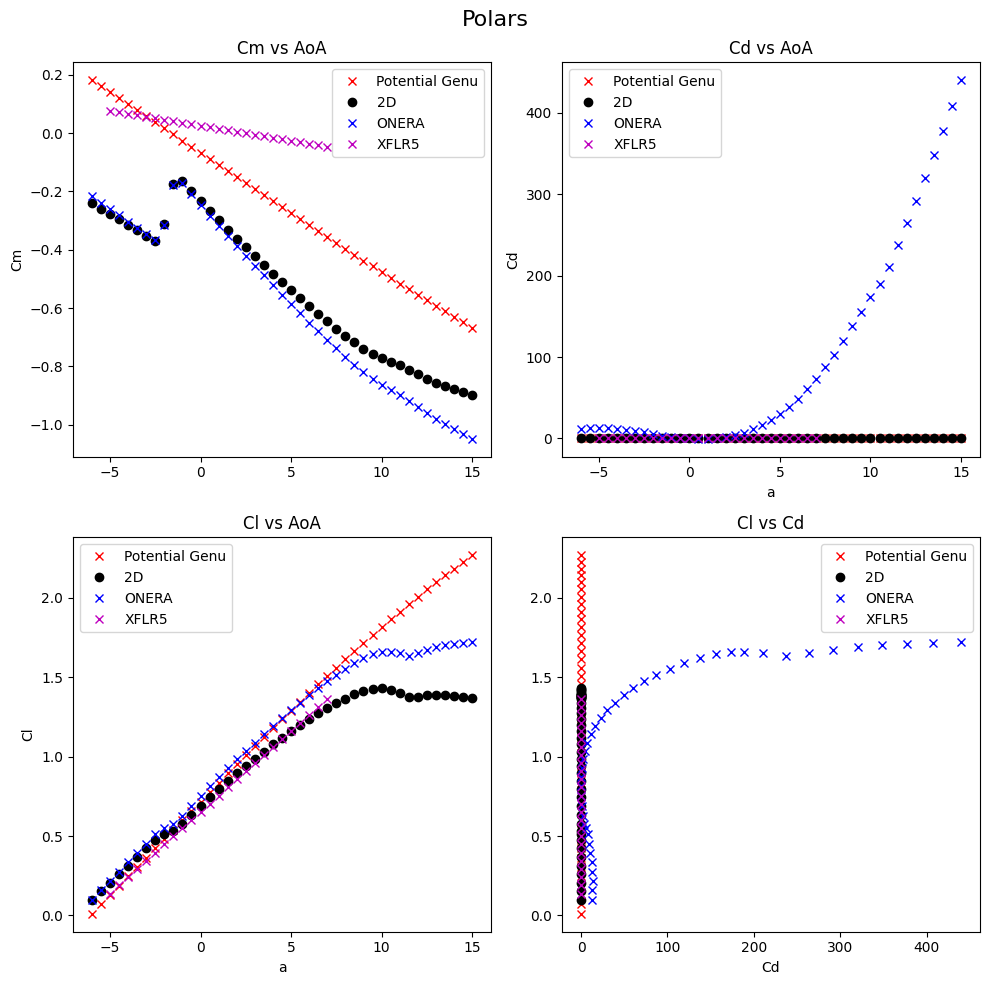

In [9]:
genuPOT = np.vstack((angles, genu["CL_Pot"],genu["CD_Pot"],genu["Cm_Pot"])).T
genu2D = np.vstack((angles, genu["CL_2D"],genu["CD_2D"],genu["Cm_2D"])).T
genuONERA = np.vstack((angles, genu["CL_ONERA"],genu["CD_ONERA"],genu["Cm_ONERA"])).T
xflr5 = np.vstack((xflr["alpha"], xflr["CL"],xflr['CD'],xflr["Cm"])).T

pot = [genuPOT, "rx",     f"Potential Genu"]
twoD = [genu2D, "ko",     f"2D"]
# onera = [genuONERA, "bx",     f"ONERA"]
xflrP = [xflr5, "mx",     f"XFLR5"]

aplt.plotAeorCoeffs([pot,twoD,onera,xflrP],(10,10),'Polars')